In [2]:
# Pagrindinės bibliotekos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Vizualizacijai, atkreipkite dėmesį, kad naudojame "matplotlib" pagrindu
import warnings
import requests
from datetime import datetime
from bs4 import BeautifulSoup
import time
import sqlite3

# Duomenų modeliavimas ir analizė
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Darbas su interneto naršyklėmis per Selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# Įspėjimų ignoravimas
warnings.filterwarnings('ignore')

# Specializuoti moduliai
from numpy.polynomial import Polynomial


In [ ]:
# https://www.kaggle.com/competitions/home-data-for-ml-course/data

# Prieš pateikdami duomenis į Home Data competiton, namų kainas įvertinkite taikydami kelis skirtingus ML modelius - 
# LinearRegression, DecissionTreeRegressor, RandomForestRegressor, iš šių moelių atrinkite geriausią, ir šio geriausio 
# modelio rezultatus siųskite.

# Competitons atveju - taip pat turite turėti grafikus/vizualizacijas, kuriomis galėtumėte pagrįsti ML modelių pasirinkimą, 
# ML modelio apmokymui pateiktų požymių (features) rinkinį.

In [36]:
test = r"C:\Users\Pauliussl\Paskaita82\test.csv"
train = r"C:\Users\Pauliussl\Paskaita82\train.csv"

Xtrain = pd.read_csv(train)
Xtrain.dropna(axis=0, subset=['SalePrice'], inplace=True)

y = Xtrain.SalePrice
Xtrain.drop(['SalePrice'], axis=1, inplace=True)
Xtrain = Xtrain[['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']]

X_train, X_test, y_train, y_test = train_test_split(Xtrain, y, test_size=0.2, random_state=42)

### Random forrest regression ###

model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print('Absoliucioji paklaida Random Forrest regression:', mae)


### Linear regression ###

model2 = LinearRegression()
model2.fit(X_train, y_train)
predictions2 = model2.predict(X_test)

mae2 = mean_absolute_error(y_test, predictions2)
print('Absoliucioji paklaida Linear regression:', mae2)

### Decision Tree regression ###

model3 = DecisionTreeRegressor()
model3.fit(X_train, y_train)
predictions3 = model3.predict(X_test)

mae3 = mean_absolute_error(y_test, predictions3)
print('Absoliucioji paklaida Decision Tree regression:', mae3)


Absoliucioji paklaida Random Forrest regression: 22435.748944063926
Absoliucioji paklaida Linear regression: 29296.717642249972
Absoliucioji paklaida Decision Tree regression: 31262.292237442925


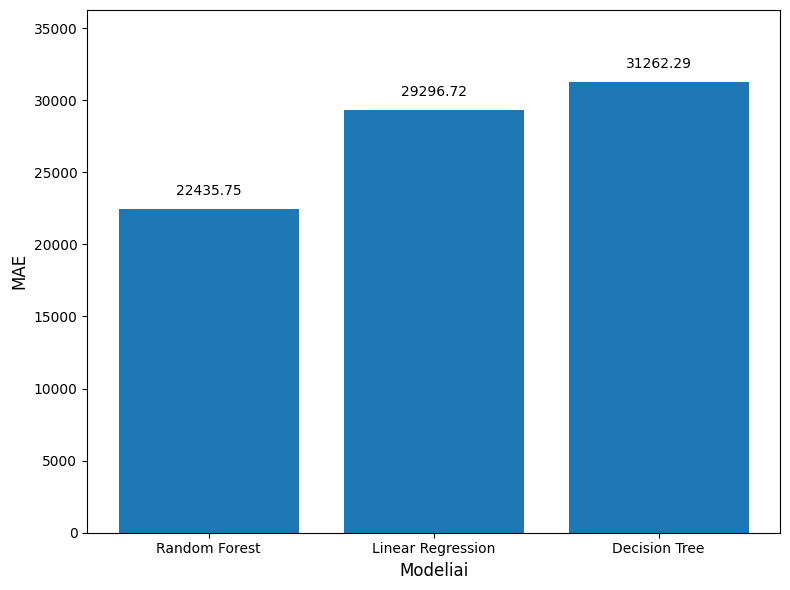

In [45]:
modeliai = ['Random Forest', 'Linear Regression', 'Decision Tree']
paklaidos = [mae, mae2, mae3]


plt.figure(figsize=(8, 6))
plt.bar(modeliai, paklaidos)
plt.xlabel('Modeliai', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.ylim(0, max(paklaidos) + 5000)

# Reiksmes virs stulpeliu
for i, v in enumerate(paklaidos):
    plt.text(i, v + 1000, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [42]:
### Geriausio modelio pritaikymas ###
test_csv0 = pd.read_csv(test)
test_csv = test_csv0[['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']]
test_predictions = model.predict(test_csv)

## DataFrame sukurimas ir CSV issaugojimas
rezultatas = pd.DataFrame({'Id':test_csv0.Id, 'SalePrice':test_predictions})
rezultatas.to_csv('submissionCSV.csv', index=False)